In [40]:
#Reference: https://www.cs.colorado.edu/~mozer/Teaching/syllabi/DeepLearningFall2017/assignments/family_trees/create_dataset.py
import numpy as np

def familytree():
    def bitvec(ix,nbit):
        out = []
        for i in range(nbit):
            out.append((i==ix)+0.0)
        return np.array(out)

    names = [ "Christopher", "Andrew", "Arthur", "James", "Charles", "Colin", "Penelope", "Christine", "Victoria", "Jennifer", "Margaret", "Charlotte", "Roberto", "Pierro", "Emilio", "Marco", "Tomaso", "Alfonso", "Maria", "Francesca", "Lucia", "Angela", "Gina", "Sophia"]
    relations = [ "husband", "wife", "son", "daughter", "father", "mother", "brother", "sister", "nephew", "niece", "uncle", "aunt"]

    dataset = []
    with open('relations.txt','r') as f:
        for line in f:
            sline = line.split();
            p1 = names.index(sline[0])
            r = relations.index(sline[1])
            p2 = names.index(sline[2])
            d = [ sline[0]+'-'+sline[1]+'-'+sline[2], 
                  np.concatenate((bitvec(p1,len(names)),bitvec(r,len(relations)))),
                  bitvec(p2,len(names)) ]
                  #bitvec(p2,len(names)) ]
            dataset.append(d)

    return dataset

import numpy as np

def familytree():
    def bitvec(ix,nbit):
        out = []
        for i in range(nbit):
            out.append((i==ix)+0.0)
        return np.array(out)

    names = [ "Christopher", "Andrew", "Arthur", "James", "Charles", "Colin", "Penelope", "Christine", "Victoria", "Jennifer", "Margaret", "Charlotte", "Roberto", "Pierro", "Emilio", "Marco", "Tomaso", "Alfonso", "Maria", "Francesca", "Lucia", "Angela", "Gina", "Sophia"]
    relations = [ "husband", "wife", "son", "daughter", "father", "mother", "brother", "sister", "nephew", "niece", "uncle", "aunt"]

    dataset = []
    with open('relations.txt','r') as f:
        for line in f:
            sline = line.split();
            p1 = names.index(sline[0])
            r = relations.index(sline[1])
            p2 = names.index(sline[2])
            d = [ sline[0]+'-'+sline[1]+'-'+sline[2], 
                  np.concatenate((bitvec(p1,len(names)),bitvec(r,len(relations)))),
                  bitvec(p2,len(names)) ]
                  #bitvec(p2,len(names)) ]
            dataset.append(d)

    return dataset

dataset = familytree()

print (dataset[0])
print (" ")
print (dataset[1])
print (" ")
print (dataset[0][0])
print (" ")
print (dataset[0][1])
print (" ")
print (dataset[0][2])


['Gina-husband-Emilio', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]
 
['Lucia-husband-Marco', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]
 
Gina-husband-Emilio
 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


In [41]:
'''
Author: Bryan Bo Cao
Email: boca7588@colorado.edu or bo.cao-1@colorado.edu
Github Repo: https://github.com/BryanBo-Cao/neuralnets-deeplearning
'''
from __future__ import print_function

import tensorflow as tf
import random
import copy
import matplotlib.pyplot as plt
import csv

In [42]:
print (dataset[0])
print (" ")
print (dataset[1])
print (" ")
print (dataset[0][0])
print (" ")
print (dataset[0][1])
print (" ")
print (dataset[0][2])

['Gina-husband-Emilio', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]
 
['Lucia-husband-Marco', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]
 
Gina-husband-Emilio
 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


In [43]:
train_data = dataset
# get train input and output data
train_data_Xa = []
train_data_Xb = []
train_data_Y = []
train_data_labels = []
for i in range(len(train_data)):
    train_data_Xa.append(train_data[i][1][0:24])
    train_data_Xb.append(train_data[i][1][24:])
    train_data_Y.append(train_data[i][2])
    for j in range(len(train_data[i][2])):
        if (train_data[i][2][j] == 1):
            train_data_labels.append(j)
    
print ("train_data_Xa[1]: ", train_data_Xa[1])
print ("train_data_Xb[1]: ", train_data_Xb[1])
print ("train_data_Y[1]: ", train_data_Y[1])
print ("len(train_data_Y): ", len(train_data_Y))
print ("len(train_data_Y[0]): ", len(train_data_Y[0]))
print ("train_data_labels: ", train_data_labels)

train_data_Xa[1]:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.]
train_data_Xb[1]:  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
train_data_Y[1]:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.]
len(train_data_Y):  104
len(train_data_Y[0]):  24
train_data_labels:  [14, 15, 16, 12, 13, 20, 22, 21, 18, 19, 20, 20, 18, 18, 19, 19, 15, 15, 12, 12, 13, 13, 17, 14, 15, 23, 20, 21, 14, 14, 15, 15, 17, 17, 20, 20, 21, 21, 23, 23, 14, 14, 21, 21, 23, 23, 23, 23, 17, 17, 17, 17, 2, 3, 4, 0, 1, 8, 10, 9, 6, 7, 8, 8, 6, 6, 7, 7, 3, 3, 0, 0, 1, 1, 5, 2, 3, 11, 8, 9, 2, 2, 3, 3, 5, 5, 8, 8, 9, 9, 11, 11, 2, 2, 9, 9, 11, 11, 11, 11, 5, 5, 5, 5]


In [44]:
# build the network architecture
lr = 0.05
epochs = 10000
n_inputa = 24
n_inputb = 12
n_H1a = 6
n_H1b = 6
n_H2 = 12
n_H3 = 6
n_output = 24

Xa = tf.placeholder(tf.float32)
Xb = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.int32)

wsXa_H1a = tf.Variable(tf.random_uniform([n_inputa, n_H1a], -3.0, 3.0))
wsXb_H1b = tf.Variable(tf.random_uniform([n_inputb, n_H1b], -3.0, 3.0))
print ("wsXa_H1a:", wsXa_H1a)
wsH2_H3 = tf.Variable(tf.random_uniform([n_H2, n_H3], -3.0, 3.0))
wsH3_Y = tf.Variable(tf.random_uniform([n_H3, n_output], -3.0, 3.0))

#H1a_outputs = tf.sigmoid(tf.matmul(Xa, wsXa_H1a))
H1a_outputs = tf.nn.relu(tf.matmul(Xa, wsXa_H1a))
#H1b_outputs = tf.sigmoid(tf.matmul(Xb, wsXb_H1b))
H1b_outputs = tf.nn.relu(tf.matmul(Xb, wsXb_H1b))
H2_outputs = tf.concat([H1a_outputs, H1b_outputs], 1)
print (wsXa_H1a)
print (H1a_outputs)
print (H2_outputs)
H3_outputs = tf.sigmoid(tf.matmul(H2_outputs, wsH2_H3))
hy = tf.sigmoid(tf.matmul(H3_outputs, wsH3_Y))
print ("hy: ",hy)
#train_data_hy_one = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = train_data_labels, logits = Y)
#train_data_hy_one = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = train_data_labels, logits = train_data_Y)
softmax_hy = tf.nn.softmax(hy)
print ("softmax_hy:",softmax_hy)

#cost = tf.reduce_mean(tf.square(Y - hy))
#cost = tf.reduce_mean(-tf.reduce_sum(train_data_hy * tf.log(Y), reduction_indices=[1])) #cross entropy
#cost = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = train_data_labels, logits = Y)
cost = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = train_data_labels, logits = hy)
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=train_data_labels, logits=Y))

optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

init = tf.global_variables_initializer()
print ("train_data_labels:", train_data_labels)

wsXa_H1a: <tf.Variable 'Variable_16:0' shape=(24, 6) dtype=float32_ref>
<tf.Variable 'Variable_16:0' shape=(24, 6) dtype=float32_ref>
Tensor("Relu_8:0", shape=(?, 6), dtype=float32)
Tensor("concat_4:0", shape=(?, 12), dtype=float32)
hy:  Tensor("Sigmoid_9:0", shape=(?, 24), dtype=float32)
softmax_hy: Tensor("Softmax_4:0", shape=(?, 24), dtype=float32)
train_data_labels: [14, 15, 16, 12, 13, 20, 22, 21, 18, 19, 20, 20, 18, 18, 19, 19, 15, 15, 12, 12, 13, 13, 17, 14, 15, 23, 20, 21, 14, 14, 15, 15, 17, 17, 20, 20, 21, 21, 23, 23, 14, 14, 21, 21, 23, 23, 23, 23, 17, 17, 17, 17, 2, 3, 4, 0, 1, 8, 10, 9, 6, 7, 8, 8, 6, 6, 7, 7, 3, 3, 0, 0, 1, 1, 5, 2, 3, 11, 8, 9, 2, 2, 3, 3, 5, 5, 8, 8, 9, 9, 11, 11, 2, 2, 9, 9, 11, 11, 11, 11, 5, 5, 5, 5]


In [45]:
wsXa_H1a_v = []
with tf.Session() as sess:
    sess.run(init)
    for step in xrange(epochs):
        #print ("train_data_hy[0]:", sess.run(tf.shape(tf.argmax(Y, 1)), feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
        #train network in batch size = bs
        sess.run(optimizer, feed_dict={Xa: train_data_Xa, 
                                       Xb: train_data_Xb, 
                                       Y: train_data_Y})
        
        if step % 1000 == 0:
            print (" ")
            print ("Step: ", step)
            #print ("Cost:", sess.run(cost, feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
            print ("tf.argmax(softmax_hy,1):", sess.run(tf.argmax(softmax_hy,1), feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
            #print ("softmax_hy:", sess.run(softmax_hy, feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
            #print ("hy:", sess.run(hy, feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
            correct_prediction = tf.equal(tf.argmax(softmax_hy,1), train_data_labels)
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print ("Accuracy: ", accuracy.eval({Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
                
    correct_prediction = tf.equal(tf.argmax(softmax_hy,1), train_data_labels)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
    print (sess.run([wsH3_Y], feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
    print ("Accuracy: ", accuracy.eval({Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y}))
    wsXa_H1a_v = sess.run(wsXa_H1a, feed_dict={Xa: train_data_Xa, Xb: train_data_Xb, Y: train_data_Y})
    print ("wsXa_H1a: ", wsXa_H1a_v)
    
    


 
Step:  0
tf.argmax(softmax_hy,1): [23 10 10 23 10  4 23  9 22  9 23  4 23 10  4  4 23 10 23 10 10 22  4 22  4
 23 23 10 10 23  9  9  9  9 10  4 10  9 10  4 23  4  4  4 10  9 23  9 23  9
 23  9  4 22  4 10  4  4 10 22  9  4 10  4 10  4  4  4 10 23 10 22  4  4  4
  4  4 23 23 10  9 10  9  9  9  9  9 10  9  4  9  4 10 22  4 20  9  9  9  9
 23 10 10 23]
Accuracy:  0.0480769
 
Step:  1000
tf.argmax(softmax_hy,1): [14 15 15  0 15  3  3 15 14 15 20 20 18 18 15  5 15 15 15 15 15  0 18 14 15
 23 20 20 14 14 15 15 23  5 20 20 15 15 23 23 14 14 21 20 23 23 23 23 17 23
 17 23 15  3 15 15 15 15  9  3  9  3  5  5  9  5 15 15  3  3 15  3 15 15  5
  2 15 20 15 15 23 23 15  5  5  2 15 15 15  9 23 15  2  2 11 11 23 11 11 11
 23 23 23  5]
Accuracy:  0.403846
 
Step:  2000
tf.argmax(softmax_hy,1): [14 15 15 14 15  3  3 15 18 15 20 20 18 18 15  8 15 15 15 15 15  0 18 14 15
 23 20 20 14 14 15 15 23  5 20 20 15 15 23 11 14 14 20 20 23 23 23 23 23 23
 17 23 15  3 15 15 15  3  9  3  9  3  5  5  9  5  3  3  3

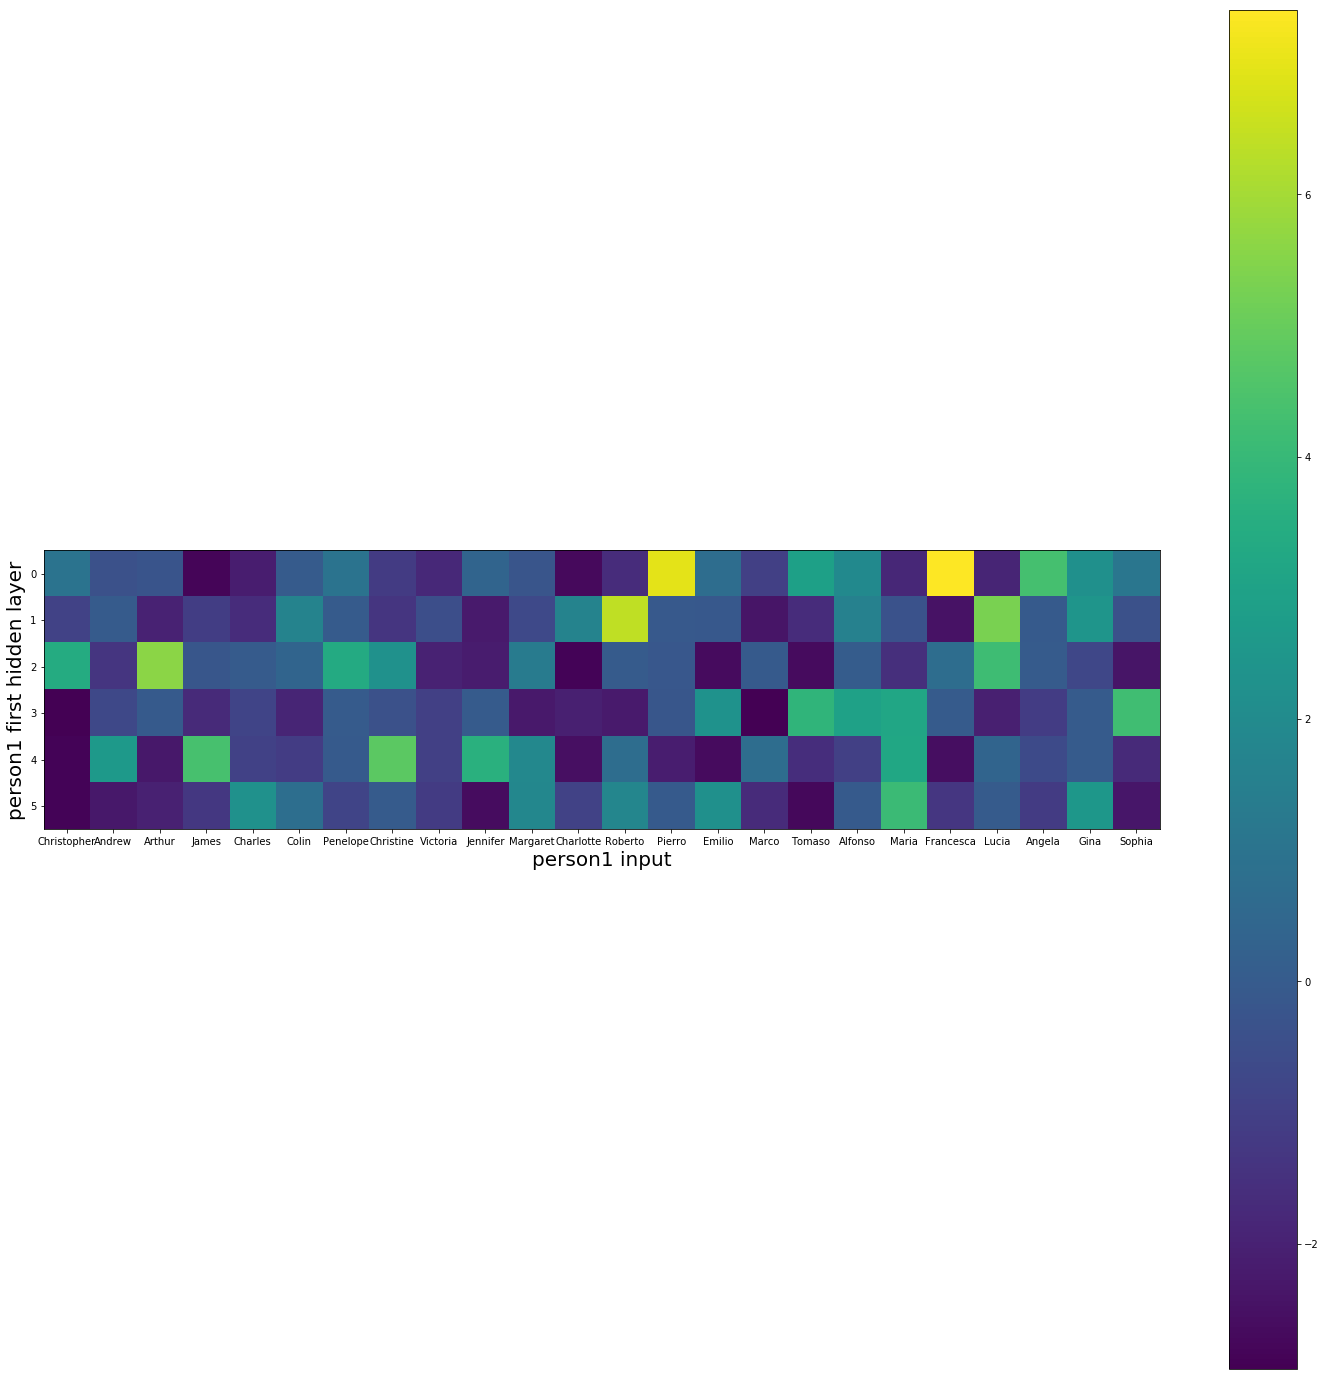

In [73]:
fig = plt.figure(figsize=(25,25))
#ax.set_aspect('equal')
plt.imshow(np.matrix.transpose(wsXa_H1a_v), interpolation='nearest')
plt.xlabel('person1 input', fontsize=20)
xnames = [ "Christopher", "Andrew", "Arthur", "James", "Charles", "Colin", "Penelope", "Christine", "Victoria", "Jennifer", "Margaret", "Charlotte", "Roberto", "Pierro", "Emilio", "Marco", "Tomaso", "Alfonso", "Maria", "Francesca", "Lucia", "Angela", "Gina", "Sophia"]
x = []
for i in range(24):
    x.append(i)
plt.xticks(x, xnames)
plt.ylabel('person1 first hidden layer', fontsize=20)
plt.colorbar()
plt.show()